In [8]:
from arango import ArangoClient
client = ArangoClient(hosts='http://localhost:8529')
db = client.db('Database_Material_Science', username='root', password='praddy')


## Load up the collections

In [9]:
entities = db.collection('entities')
publications = db.collection('publications')
edges = db.collection('publications_entities_edges')

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

# 1. Basic analysis:

In [16]:
# Analysis year wise to see where we see a stark drop:

year_cap = 2024
QUERY_pub_by_year = f"""
                        LET yearCap = {year_cap}
                        FOR publication IN publications
                            FILTER publication.year <= yearCap
                            SORT publication.year ASC
                            RETURN {{ _key: publication._key, doi: publication.doi, year: publication.year }}
                        """

cursor = db.aql.execute(QUERY_pub_by_year)
results = list(cursor)

In [17]:
df = pd.DataFrame(results)
print(df.head())

       _key                           doi  year
0   4631163              10.1038/032345a0  1885
1  12105405  10.1016/0016-0032(89)90312-8  1889
2   3466929              10.1038/061485a0  1900
3   9250058              10.1038/061248a0  1900
4   4762066              10.1038/061456a0  1900


In [24]:
# Group publications by year:

df_yearly = df.groupby('year').size().reset_index(name='count')
print(df_yearly.head())


   year  count
0  1885      1
1  1889      1
2  1900    183
3  1901    164
4  1902    156


C:\Users\Stark\AppData\Local\Temp\ipykernel_383180\2463464111.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_yearly.groupby('pub_bin').size().reset_index(name='year_count')


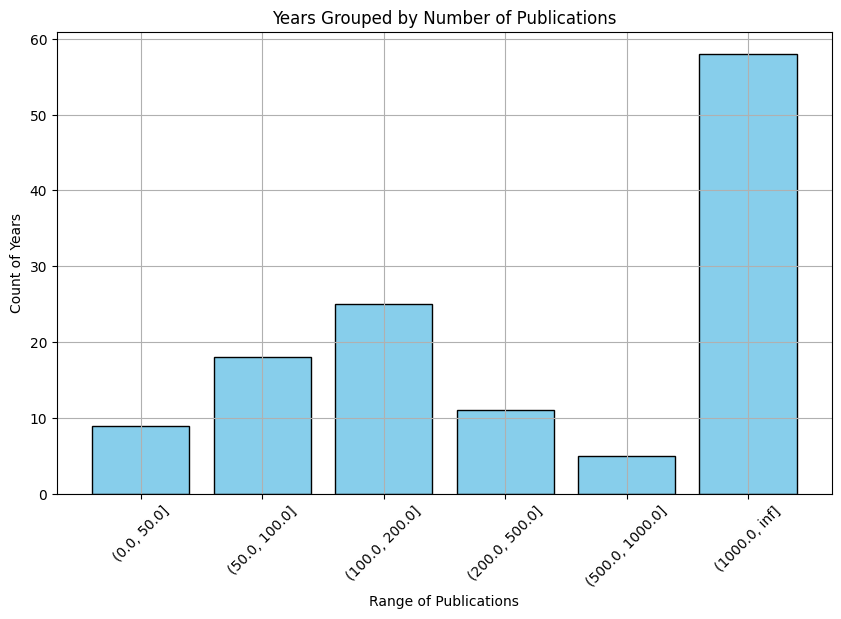